#  Classification : Nearest Neighbors and Naive Bayes 

## Classification using Nearest Neighbors

(a) Perform k-Nearest neighbours on the given dataset($X_{knn}$ and $y_{knn}$: where $X_{knn}$ stores feature vectors representing the movies and  $y_{knn}$ stores the 0-1 labelling for each movie) for binary classification of movies, for classifiying whether a given movie is a comedy(label 1) or not a comedy(label 0) . Split the dataset into train(80%), validation(10%) and test sets(10%).Run k-Nearest neighbours for different k values (1,3,7,15,31,63). Select the k, using validation set, which returns the best accuracy score. 

(i)  Report all the validation accuracies for all the values of k. 
<br>(ii) Report accuracy score by performing k-NN on the test dataset using the best chosen k value. 

In [2]:
## Importing packages
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [3]:
## Loading dataset
X_knn = pd.read_csv("X_knn.csv",header=None,sep=" ")
y_knn = pd.read_csv("y_knn.csv",header = None).astype(int)

In [4]:
# Train, Validation, Test set splittings
np.random.seed(20)
X_train_and_val,X_test, y_train_and_val, y_test = train_test_split(X_knn,y_knn,train_size = 0.9, test_size = 0.1,shuffle = True)
X_train, X_val, y_train, y_val = train_test_split(X_train_and_val,y_train_and_val,test_size = 1/9)

In [5]:
def compute_dist(X_new,X):
    """
    Function to compute distance matrix
    X_new: Dataset to perform prediction on
    X: Training dataset
    Returns -
    dist_array: Distance matrix
    """
    
    (m_new,n_new) = X_new.shape
    (m,n) = X.shape
    
    dist_array = np.zeros((m_new,m))
    
    for i in range(m_new):
        for j in range(m):
            dist = np.linalg.norm(X_new[i,:]-X[j,:])
            dist_array[i,j] = dist
    return dist_array

def predict_knn(dist_array,X_new,y,k):
    """
    Function to predict the label of a new data point using kNN
    Returns - 
    y_pred: perdicted class label vector
    """
    (m,n) = X_new.shape
    y_pred = np.zeros((m,1))
    
    for i in range(m):
        index = np.argsort(dist_array[i][:])
        pos = 0
        #Noting the labels of k-Nearest neighbours
        for near in range(k):
            if y[index[near]][0]==1:
                pos+=1
        if pos>k-pos:
            y_pred[i] = 1
        else:
            y_pred[i] = 0
            
    return y_pred
    

kNN with k = 1
Cross-Validation Accuracy: 0.797

kNN with k = 3
Cross-Validation Accuracy: 0.840

kNN with k = 7
Cross-Validation Accuracy: 0.858

kNN with k = 15
Cross-Validation Accuracy: 0.865

kNN with k = 31
Cross-Validation Accuracy: 0.862

kNN with k = 63
Cross-Validation Accuracy: 0.854



Text(0.5, 1.0, 'Validation Accuracy vs number of nearest neighbors k')

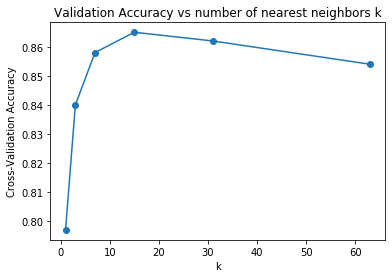

In [104]:
#Training the model with different k-values
k_values = [1,3,7,15,31,63]
cv_scores = []
models = []

dist_array = compute_dist(np.array(X_val),np.array(X_train))
for k in k_values:
    print("kNN with k = %d"%k)
    
    #Prediction on validation dataset
    y_hat_val = predict_knn(dist_array,np.array(X_val),np.array(y_train),k)
    cv_acc = np.sum(y_hat_val==y_val)[0]/len(y_val)
    print("Cross-Validation Accuracy: %0.3f"%cv_acc,end = "\n\n")
    cv_scores.append(cv_acc)

#Storing best k-value
k_best = k_values[cv_scores.index(max(cv_scores))]

#Plotting 
plt.figure()
plt.plot(k_values,cv_scores,"-o")
plt.xlabel("k")
plt.ylabel("Cross-Validation Accuracy")
plt.title("Validation Accuracy vs number of nearest neighbors k")

**We can notice that $k=15$ gives the highest cross-validation accuracy of 0.865**

In [105]:
#Evalutating the trained model on the test set with best value of k
dist_array_test = compute_dist(np.array(X_test),np.array(X_train))
y_hat_test = predict_knn(dist_array_test,np.array(X_test),np.array(y_train),k_best)
#Calculating accuracy
test_acc = np.sum(y_hat_test==y_test)[0]/len(y_test)

print("Accuracy of the best model on the test dataset = %0.3f"%test_acc)

Accuracy of the best model on the test dataset = 0.846


(b) State why using an even value of k in k-NN should not be chosen

The k-Nearest Neighbors algorithm works on the assumption that data points that are closer in distance are similar. Precisely, if we want to predict the class of a given data point, we observe the class labels of the k nearest (in distance) neighbours. We assign the label to the data point based on the majority of the labels of k nearest neighbors. 

In this regard, considering binary classification, if $k$ is even, there are chances that $k/2$ neighbors are labeled as one class (say class $1$) and the remaining $k/2$ neighbors are labeled the other (class $0$). This results in a tie as no class is the majority among the neighbours, and hence it becomes difficult to assign a label to the data point. To bypass this issue, it is recommended to choose an odd value of k.

In datasets involving multiple classes (more than 2), such situations are more prone to occur even if $k$ is not even.

## Learning Naive Bayes' classifier  

### From Continuous Distribution of data

Here, the distribution of the data( $X$ represents the datapoints and $Y$ represents the 0-1 binary-class label; where 0 being the negative class and 1 being the positive class) is already known.
<br>Consider the following one-dimensional(1-D) Gaussian distributions where means and variances are unknown. You need to estimate means($\mu_-$: for negative class and  $\mu_+$: for positive class) and variances ($\sigma^{2}_{-}$: for negative class and $\sigma^{2}_+$: for positive class) from the given data : 
<br> (1) Assume $X|Y_{Y=0} \sim \mathcal{N}(\mu_- , \sigma^{2}_-)$ 
<br>(2) Assume $X|Y_{Y=1} \sim \mathcal{N}(\mu_+ , \sigma^{2}_+)$


*Generating artificial datasets in the next cell *

In [107]:
## This cell is for generating datasets. Students should not change anything in this cell. 
## You can compare your mean and variance estimates by the actual ones used to generate these datasets

import numpy as np
X_pos = np.random.randn(1000,1)+np.array([[2.]])
X_neg = np.random.randn(1000,1)+np.array([[4.]])
X_train_pos = X_pos[:900]
X_train_neg = X_neg[:900]
X_test_pos = X_pos[900:]
X_test_neg = X_neg[900:]
X_train = np.concatenate((X_train_pos, X_train_neg), axis=0)
X_test = np.concatenate((X_test_pos, X_test_neg), axis=0)
Y_train = np.concatenate(( np.ones(900),np.zeros(900) ))
Y_test = np.concatenate(( np.ones(100), np.zeros(100) ))

## X_train, X_test, Y_train, Y_test are your datasets to work with ####



<br>**Instructions to follow for learning a Baeysian classifier:** *(Code the formulae for estimating the different parameters yourself)*
<br> a)Utilize the training dataset to estimate the means($\hat{\mu_+}$,$\hat{\mu_-}$) and variances($\hat{\sigma^{2}_+}$, $\hat{\sigma^{2}_-}$) for both positive and negative classes  
b)Estimate the prior probability: $P(Y=1)$  ⟶ which could be referred to as: $\hat{a}$ 
<br>c)Estimate the classifier funtion/posterior probability:  $P(Y=1|X = x)$  ⟶ which could be referred to as $\hat{\eta(x)}$
<br>d)Find out the threshold value($x^*$) for classification by equating the estimated classifier function($\hat{\eta(x)}$)  with threshold probability of 0.5
<br>e)Classify the test dataset into the two classes using this threshold value($x^*$) and find out the **accuracy** of the prediction 

Return back:  $\hat{\mu_+}$, $\hat{\mu_-}$, $\hat{\sigma^{2}_+}$, $\hat{\sigma^{2}_-}$, $\hat{a}$, $x^*$ and accuracy from the code written 

*Hint: $X|Y_{Y=0} \sim \mathcal{N}(\mu_- , \sigma^{2}_-)$ implies $P_{X|Y=0} = \mathcal{N}(\mu_- , \sigma^{2}_-) $*


In [108]:
## Training Naive Bayes Algorithm
# Estimating prior probabilities from training data
(m,n) = X_train.shape
prior_1 = np.sum(Y_train==1)/m  #a_cap = p(Y=1)
prior_0 = 1-prior_1

gauss = lambda x,mu,sig: (1/(np.sqrt(2*np.pi)*sig)) * np.exp(-((x-mu)**2)/(2*sig**2))

# Estimating parameters of Gaussian distribution for each class
mu_class0 = np.mean(X_train[Y_train==0])
mu_class1 = np.mean(X_train[Y_train==1])

std_class0 = np.std(X_train[Y_train==0])
std_class1 = np.std(X_train[Y_train==1])

#Evaluating likelihoods of the training data for each class
class_probab_0 = gauss(X_train,mu_class0,std_class0)*prior_0
class_probab_1 = gauss(X_train,mu_class1,std_class1)*prior_1

#Evaluating posterior probabilities of the training data for each class
posterior_class0 = class_probab_0/(class_probab_0+class_probab_1)
posterior_class1 = class_probab_1/(class_probab_0+class_probab_1)

#Training set predictions
Y_pred_train = (posterior_class1>0.5).astype(int)

#Determining training accuracy
train_acc = np.mean(Y_pred_train == Y_train.reshape(-1,1))

In [109]:
mu_class1, mu_class0, std_class1**2, std_class0**2, prior_1

(1.9547133896235733,
 4.047271149433509,
 0.9409209740987953,
 0.9352267651153012,
 0.5)

$$\hat{\mu_+} = 1.9547$$
$$\hat{\mu_-} = 4.0473$$
$$\hat{\sigma^{2}_+} = 0.94092$$
$$\hat{\sigma^{2}_-} = 0.93523$$
$$\hat{a} = 0.5$$ 

Hence, the classifier/posterior PDF function (upon cancelling the prior and normalisation terms) is $$P(Y=1|X=x) = \hat{\eta}(x) = \frac{\frac{1}{\sigma_+}e^{-\frac{(x-\mu_+)^2}{2\sigma^{2}_+}}}{\frac{1}{\sigma_+}e^{-\frac{(x-\mu_+)^2}{2\sigma^{2}_+}} + \frac{1}{\sigma_-}e^{-\frac{(x-\mu_-)^2}{2\sigma^{2}_-}}}$$

$\hat{\eta}(X_{train})$ is given blow

In [110]:
pd.DataFrame(posterior_class1)

,0
0,0.885333
1,0.554934
2,0.701000
3,0.328543
4,0.832632
...,...
1795,0.003395
1796,0.197703
1797,0.011511
1798,0.025318


Equating $\hat{\eta}(x) = P(Y=1) = 0.5$, we can reframe it to solving the roots of:

$$(\frac{1}{2\hat{\sigma^{2}_+}} - \frac{1}{2\hat{\sigma^{2}_-}})x^2 + (\frac{\mu_-}{\hat{\sigma^{2}_-}} - \frac{\mu_+}{\hat{\sigma^{2}_+}})x + \frac{\mu_+^2}{\hat{2\sigma^{2}_+}} - \frac{\mu_-^2}{2\hat{\sigma^{2}_-}} - \ln(\frac{\sigma_-}{\sigma_+}) = 0$$

In [111]:
## Mathematically determining x* by solving the quadratic equation
a = (1/(2*std_class1**2) - 1/(2*std_class0**2))
b = (mu_class0/(std_class0**2) - mu_class1/(std_class1**2))
c = (mu_class1**2/(2*std_class1**2) - mu_class0**2/(2*std_class0**2)) - np.log(std_class0/std_class1)

x_star = (-b + np.sqrt(b**2-4*a*c))/(2*a)

In [112]:
x_star

3.001219448352256

Hence $$x^* = 3.00122$$

Therefore, if $x>x^*$, $Y$ is more likely to be $0$ and if $x<x^*$, $Y$ is more likely to be $1$

In [116]:
print("Training Accuracy: %f"%train_acc)

Training Accuracy: 0.860000


In [120]:
#Classifying the test dataset based on the obtained threshold x*

m_test = X_test.shape[0]

Y_pred_test = np.zeros((m_test,1))
#Values less than the threshold are labelled 1
Y_pred_test[X_test<=x_star] = 1

test_acc = np.mean(Y_pred_test == Y_test.reshape(-1,1))

In [121]:
print("Test Accuracy: %f"%test_acc)

Test Accuracy: 0.800000


### From Discrete distribution of data

Unlike the first exercise for learning the Naive Bayes' classifier where we dealt with continuous distribution of data, here you need to work with discrete data, which means finding Probability Mass Distribution(PMF). 

Age  | Income | Status  | Buy
-----|--------|-------- |----
<=20 |  low   | students| yes
<=20 |  high  | students| yes
<=20 | medium | students| no
<=20 | medium | married | no
<=20 |  high  | married | yes
21-30|  low   | married | yes
21-30|  low   | married | no 
21-30| medium | students| no
21-30|  high  | students| yes
 >30 |  high  | married | no
 >30 |  high  | married | yes
 >30 | medium | married | yes
 >30 | medium | married | no
 >30 | medium | students| no
 
Consider the train dataset above. Take any random datapoint ($X_{i}$) where $X_{i} = (X_{i,1} = Age,X_{i,2} = Income,X_{i,3} = Status)$ and its corresponding label 

($Y_{i} = Buy$). A "yes" in Buy corresponds to label-1 and a "no" in Buy corresponds to label-0.

<br>**Instructions to follow for learning a Baeysian classifier:** *(Code the formulae for estimating the different parameters yourself)*
<br> a)Estimate the prior probability: $P(Y=1)$  ⟶ which could be referred to as: $\hat{a}$   
b)Estimate the likelihood for each feature:  $P(X_{i,j} = x |Y = y_{i})$, where $ i$=datapoint counter, $j \in \{1,2,3\}$ and $y_{i} \in \{0,1\}$ 
<br>c)Estimate the total likelihood: $P(X_{i} = x |Y = y_{i})$  
d)Calculate the posterior probability: $P(Y = 1|X_{i} = x_{test} )$ = $p_{test}$ where $x_{test} = (Age = 21-30, Income= medium, Status = married)$


Return back: $\hat{a}$, total likelihood and $p_{test}$ 


In [1]:
## Part (a) - Estimating prior, P(Y=1)

#a_cap = P(Y=1)
prior_buy = 7/14
#P(Y=0)
prior_nobuy = 1- prior_buy

In [2]:
print(prior_buy)

0.5


$$\hat{a} = P(Y=1) = 0.5$$

In [3]:
### Part (b) - Likelihood of each feature 

## Feature - Age
#P(X_i_1 = "<=20"/Y=1)
p_lt20_buy = 3/7
#P(X_i_1 = "21 to 30"/Y=1)
p_21to30_buy = 2/7
#P(X_i_1 = ">30"/Y=1)
p_gt30_buy = 1-p_lt20_buy-p_21to30_buy

#P(X_i_1 = "<=20"/Y=0)
p_lt20_nobuy = 2/7
#P(X_i_1 = "21 to 30"/Y=0)
p_21to30_nobuy = 2/7
#P(X_i_1 = ">30"/Y=0)
p_gt30_nobuy = 1-p_lt20_nobuy-p_21to30_nobuy

## Feature - Income
#P(X_i_2 = high/Y=1)
p_high_buy = 4/7
#P(X_i_2 = medium/Y=1)
p_medium_buy = 1/7
#P(X_i_2 = low/Y=1)
p_low_buy = 1-p_high_buy-p_medium_buy

#P(X_i_2 = high/Y=0)
p_high_nobuy = 1/7
#P(X_i_2 = medium/Y=0)
p_medium_nobuy = 5/7
#P(X_i_2 = low/Y=0)
p_low_nobuy = 1-p_high_nobuy-p_medium_nobuy

## Feature - Status
#P(X_i_3 = students/Y=1)
p_students_buy = 3/7
#P(X_i_3 = married/Y=1)
p_married_buy = 1-p_students_buy

#P(X_i_3 = students/Y=0)
p_students_nobuy = 3/7
#P(X_i_3 = married/Y=0)
p_married_nobuy = 1 - p_students_nobuy

In [66]:
print("j=1,2,3 represent features Age, Income and Status, respectively\n")
print("Y=1 represents bought, and Y=0 represents not bought\n")
print("P(X_{i1}= '<=20'|Y=1) = %f"%p_lt20_buy)
print("P(X_{i1}= '21 to 30'|Y=1) = %f"%p_21to30_buy)
print("P(X_{i1}= '>30'|Y=1) = %f"%p_gt30_buy)
print("P(X_{i1}= '<=20'|Y=0) = %f"%p_lt20_nobuy)
print("P(X_{i1}= '21 to 30'|Y=0) = %f"%p_21to30_nobuy)
print("P(X_{i1}= '>30'|Y=0) = %f"%p_gt30_nobuy)
print("")
print("P(X_{i2}= 'low'|Y=1) = %f"%p_low_buy)
print("P(X_{i2}= 'medium'|Y=1) = %f"%p_medium_buy)
print("P(X_{i2}= 'high'|Y=1) = %f"%p_high_buy)
print("P(X_{i2}= 'low'|Y=0) = %f"%p_low_nobuy)
print("P(X_{i2}= 'medium'|Y=0) = %f"%p_medium_nobuy)
print("P(X_{i2}= 'high'|Y=0) = %f"%p_high_nobuy)
print("")
print("P(X_{i3}= 'student'|Y=1) = %f"%p_students_buy)
print("P(X_{i3}= 'married'|Y=1) = %f"%p_married_buy)
print("P(X_{i3}= 'student'|Y=0) = %f"%p_students_buy)
print("P(X_{i3}= 'married'|Y=0) = %f"%p_married_nobuy)

j=1,2,3 represent features Age, Income and Status, respectively

Y=1 represents bought, and Y=0 represents not bought

P(X_{i1}= '<=20'|Y=1) = 0.428571
P(X_{i1}= '21 to 30'|Y=1) = 0.285714
P(X_{i1}= '>30'|Y=1) = 0.285714
P(X_{i1}= '<=20'|Y=0) = 0.285714
P(X_{i1}= '21 to 30'|Y=0) = 0.285714
P(X_{i1}= '>30'|Y=0) = 0.428571

P(X_{i2}= 'low'|Y=1) = 0.285714
P(X_{i2}= 'medium'|Y=1) = 0.142857
P(X_{i2}= 'high'|Y=1) = 0.571429
P(X_{i2}= 'low'|Y=0) = 0.142857
P(X_{i2}= 'medium'|Y=0) = 0.714286
P(X_{i2}= 'high'|Y=0) = 0.142857

P(X_{i3}= 'student'|Y=1) = 0.428571
P(X_{i3}= 'married'|Y=1) = 0.571429
P(X_{i3}= 'student'|Y=0) = 0.428571
P(X_{i3}= 'married'|Y=0) = 0.571429


In [53]:
### Part (c) -Estimating total likelihoods of all feature combinations, for class 1

#P(X_i = ""<=20","low","students""/Y=1)
p_lt20_low_students_buy = p_lt20_buy*p_low_buy*p_students_buy
#P(X_i = ""<=20","low","married""/Y=1)
p_lt20_low_married_buy = p_lt20_buy*p_low_buy*p_married_buy
#P(X_i = ""<=20","medium","students""/Y=1)
p_lt20_medium_students_buy = p_lt20_buy*p_medium_buy*p_students_buy
#P(X_i = ""<=20","medium","married""/Y=1)
p_lt20_medium_married_buy = p_lt20_buy*p_medium_buy*p_married_buy
#P(X_i = ""<=20","high","students""/Y=1)
p_lt20_high_students_buy = p_lt20_buy*p_high_buy*p_students_buy
#P(X_i = ""<=20","high","married""/Y=1)
p_lt20_high_married_buy = p_lt20_buy*p_high_buy*p_married_buy

#P(X_i = ""21 to 30","low","students""/Y=1)
p_21to30_low_students_buy = p_21to30_buy*p_low_buy*p_students_buy
#P(X_i = ""21 to 30","low","married""/Y=1)
p_21to30_low_married_buy = p_21to30_buy*p_low_buy*p_married_buy
#P(X_i = ""21 to 30","medium","students""/Y=1)
p_21to30_medium_students_buy = p_21to30_buy*p_medium_buy*p_students_buy
#P(X_i = ""21 to 30","medium","married""/Y=1)
p_21to30_medium_married_buy = p_21to30_buy*p_medium_buy*p_married_buy
#P(X_i = ""21 to 30","high","students""/Y=1)
p_21to30_high_students_buy = p_21to30_buy*p_high_buy*p_students_buy
#P(X_i = ""21 to 30","high","married""/Y=1)
p_21to30_high_married_buy = p_21to30_buy*p_high_buy*p_married_buy

#P(X_i = "">30","low","students""/Y=1)
p_gt30_low_students_buy = p_gt30_buy*p_low_buy*p_students_buy
#P(X_i = "">30","low","married""/Y=1)
p_gt30_low_married_buy = p_gt30_buy*p_low_buy*p_married_buy
#P(X_i = "">30","medium","students""/Y=1)
p_gt30_medium_students_buy = p_gt30_buy*p_medium_buy*p_students_buy
#P(X_i = "">30","medium","married""/Y=1)
p_gt30_medium_married_buy = p_gt30_buy*p_medium_buy*p_married_buy
#P(X_i = "">30","high","students""/Y=1)
p_gt30_high_students_buy = p_gt30_buy*p_high_buy*p_students_buy
#P(X_i = "">30","high","married""/Y=1)
p_gt30_high_married_buy = p_gt30_buy*p_high_buy*p_married_buy


In [59]:
### Part (c) -Estimating total likelihoods of all feature combinations, for class 0

#P(X_i = ""<=20","low","students""/Y=0)
p_lt20_low_students_nobuy = p_lt20_nobuy*p_low_nobuy*p_students_nobuy
#P(X_i = ""<=20","low","married""/Y=0)
p_lt20_low_married_nobuy = p_lt20_nobuy*p_low_nobuy*p_married_nobuy
#P(X_i = ""<=20","medium","students""/Y=0)
p_lt20_medium_students_nobuy = p_lt20_nobuy*p_medium_nobuy*p_students_nobuy
#P(X_i = ""<=20","medium","married""/Y=0)
p_lt20_medium_married_nobuy = p_lt20_nobuy*p_medium_nobuy*p_married_nobuy
#P(X_i = ""<=20","high","students""/Y=0)
p_lt20_high_students_nobuy = p_lt20_nobuy*p_high_nobuy*p_students_nobuy
#P(X_i = ""<=20","high","married""/Y=0)
p_lt20_high_married_nobuy = p_lt20_nobuy*p_high_nobuy*p_married_nobuy

#P(X_i = ""21 to 30","low","students""/Y=0)
p_21to30_low_students_nobuy = p_21to30_nobuy*p_low_nobuy*p_students_nobuy
#P(X_i = ""21 to 30","low","married""/Y=0)
p_21to30_low_married_nobuy = p_21to30_nobuy*p_low_nobuy*p_married_nobuy
#P(X_i = ""21 to 30","medium","students""/Y=0)
p_21to30_medium_students_nobuy = p_21to30_nobuy*p_medium_nobuy*p_students_nobuy
#P(X_i = ""21 to 30","medium","married""/Y=0)
p_21to30_medium_married_nobuy = p_21to30_nobuy*p_medium_nobuy*p_married_nobuy
#P(X_i = ""21 to 30","high","students""/Y=0)
p_21to30_high_students_nobuy = p_21to30_nobuy*p_high_nobuy*p_students_nobuy
#P(X_i = ""21 to 30","high","married""/Y=0)
p_21to30_high_married_nobuy = p_21to30_nobuy*p_high_nobuy*p_married_nobuy

#P(X_i = "">30","low","students""/Y=0)
p_gt30_low_students_nobuy = p_gt30_nobuy*p_low_nobuy*p_students_nobuy
#P(X_i = "">30","low","married""/Y=0)
p_gt30_low_married_nobuy = p_gt30_nobuy*p_low_nobuy*p_married_nobuy
#P(X_i = "">30","medium","students""/Y=0)
p_gt30_medium_students_nobuy = p_gt30_nobuy*p_medium_nobuy*p_students_nobuy
#P(X_i = "">30","medium","married""/Y=0)
p_gt30_medium_married_nobuy = p_gt30_nobuy*p_medium_nobuy*p_married_nobuy
#P(X_i = "">30","high","students""/Y=0)
p_gt30_high_students_nobuy = p_gt30_nobuy*p_high_nobuy*p_students_nobuy
#P(X_i = "">30","high","married""/Y=0)
p_gt30_high_married_nobuy = p_gt30_nobuy*p_high_nobuy*p_married_nobuy


In [62]:
print("P(X_{i}= '<=20','low','student'|Y=1) = %f"%p_lt20_low_students_buy)
print("P(X_{i}= '<=20','low','married'|Y=1) = %f"%p_lt20_low_married_buy)
print("P(X_{i}= '<=20','medium','student'|Y=1) = %f"%p_lt20_medium_students_buy)
print("P(X_{i}= '<=20','medium','married'|Y=1) = %f"%p_lt20_medium_married_buy)
print("P(X_{i}= '<=20','high','student'|Y=1) = %f"%p_lt20_high_students_buy)
print("P(X_{i}= '<=20','high','married'|Y=1) = %f"%p_lt20_high_married_buy)

print("")
print("P(X_{i}= '<=20','low','student'|Y=0) = %f"%p_lt20_low_students_nobuy)
print("P(X_{i}= '<=20','low','married'|Y=0) = %f"%p_lt20_low_married_nobuy)
print("P(X_{i}= '<=20','medium','student'|Y=0) = %f"%p_lt20_medium_students_nobuy)
print("P(X_{i}= '<=20','medium','married'|Y=0) = %f"%p_lt20_medium_married_nobuy)
print("P(X_{i}= '<=20','high','student'|Y=0) = %f"%p_lt20_high_students_nobuy)
print("P(X_{i}= '<=20','high','married'|Y=0) = %f"%p_lt20_high_married_nobuy)
print("")
print("P(X_{i}= '21 to 30','low','student'|Y=1) = %f"%p_21to30_low_students_buy)
print("P(X_{i}= '21 to 30','low','married'|Y=1) = %f"%p_21to30_low_married_buy)
print("P(X_{i}= '21 to 30','medium','student'|Y=1) = %f"%p_21to30_medium_students_buy)
print("P(X_{i}= '21 to 30','medium','married'|Y=1) = %f"%p_21to30_medium_married_buy)
print("P(X_{i}= '21 to 30','high','student'|Y=1) = %f"%p_21to30_high_students_buy)
print("P(X_{i}= '21 to 30','high','married'|Y=1) = %f"%p_21to30_high_married_buy)
print("")
print("P(X_{i}= '21 to 30','low','student'|Y=0) = %f"%p_21to30_low_students_nobuy)
print("P(X_{i}= '21 to 30','low','married'|Y=0) = %f"%p_21to30_low_married_nobuy)
print("P(X_{i}= '21 to 30','medium','student'|Y=0) = %f"%p_21to30_medium_students_nobuy)
print("P(X_{i}= '21 to 30','medium','married'|Y=0) = %f"%p_21to30_medium_married_nobuy)
print("P(X_{i}= '21 to 30','high','student'|Y=0) = %f"%p_21to30_high_students_nobuy)
print("P(X_{i}= '21 to 30','high','married'|Y=0) = %f"%p_21to30_high_married_nobuy)
print("")
print("P(X_{i}= '>30','low','student'|Y=1) = %f"%p_gt30_low_students_buy)
print("P(X_{i}= '>30','low','married'|Y=1) = %f"%p_gt30_low_married_buy)
print("P(X_{i}= '>30','medium','student'|Y=1) = %f"%p_gt30_medium_students_buy)
print("P(X_{i}= '>30','medium','married'|Y=1) = %f"%p_gt30_medium_married_buy)
print("P(X_{i}= '>30','high','student'|Y=1) = %f"%p_gt30_high_students_buy)
print("P(X_{i}= '>30','high','married'|Y=1) = %f"%p_gt30_high_married_buy)
print("")
print("P(X_{i}= '>30','low','student'|Y=0) = %f"%p_gt30_low_students_nobuy)
print("P(X_{i}= '>30','low','married'|Y=0) = %f"%p_gt30_low_married_nobuy)
print("P(X_{i}= '>30','medium','student'|Y=0) = %f"%p_gt30_medium_students_nobuy)
print("P(X_{i}= '>30','medium','married'|Y=0) = %f"%p_gt30_medium_married_nobuy)
print("P(X_{i}= '>30','high','student'|Y=0) = %f"%p_gt30_high_students_nobuy)
print("P(X_{i}= '>30','high','married'|Y=0) = %f"%p_gt30_high_married_nobuy)

P(X_{i}= '<=20','low','student'|Y=1) = 0.052478
P(X_{i}= '<=20','low','married'|Y=1) = 0.069971
P(X_{i}= '<=20','medium','student'|Y=1) = 0.026239
P(X_{i}= '<=20','medium','married'|Y=1) = 0.034985
P(X_{i}= '<=20','high','student'|Y=1) = 0.104956
P(X_{i}= '<=20','high','married'|Y=1) = 0.139942

P(X_{i}= '<=20','low','student'|Y=0) = 0.017493
P(X_{i}= '<=20','low','married'|Y=0) = 0.023324
P(X_{i}= '<=20','medium','student'|Y=0) = 0.087464
P(X_{i}= '<=20','medium','married'|Y=0) = 0.116618
P(X_{i}= '<=20','high','student'|Y=0) = 0.017493
P(X_{i}= '<=20','high','married'|Y=0) = 0.023324

P(X_{i}= '21 to 30','low','student'|Y=1) = 0.034985
P(X_{i}= '21 to 30','low','married'|Y=1) = 0.046647
P(X_{i}= '21 to 30','medium','student'|Y=1) = 0.017493
P(X_{i}= '21 to 30','medium','married'|Y=1) = 0.023324
P(X_{i}= '21 to 30','high','student'|Y=1) = 0.069971
P(X_{i}= '21 to 30','high','married'|Y=1) = 0.093294

P(X_{i}= '21 to 30','low','student'|Y=0) = 0.017493
P(X_{i}= '21 to 30','low','marrie

In [63]:
#Part (d) - Calculating posterior probability of test data point - ('21 to 30', 'medium' , 'married')
posterior_buy_xtest = p_21to30_medium_married_buy/(p_21to30_medium_married_buy+p_21to30_medium_married_nobuy)

In [64]:
print(posterior_buy_xtest)

0.16666666666666663


$$p_{test} = 0.166667$$